# LAB - 4
## Data Visualization
---
    Aryan Tiwari
    B20AI056

---

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [5]:
# sns.set_palette(sns.color_palette("Set2"))

In [6]:
# collegedata = pd.read_csv("MergerdAyush_Colleges_in_India_01-04-2021_0.csv")
# collegedata.head()

In [7]:
# agriculturedata = pd.read_csv("Production_of_Agriculture_Stock-Ministry_of_Finance.csv")
# agriculturedata.head()

In [8]:
# roaddata = pd.read_csv("Road_Transport_BRS_2017-18_Annexure7_9c.csv")
# roaddata.head()

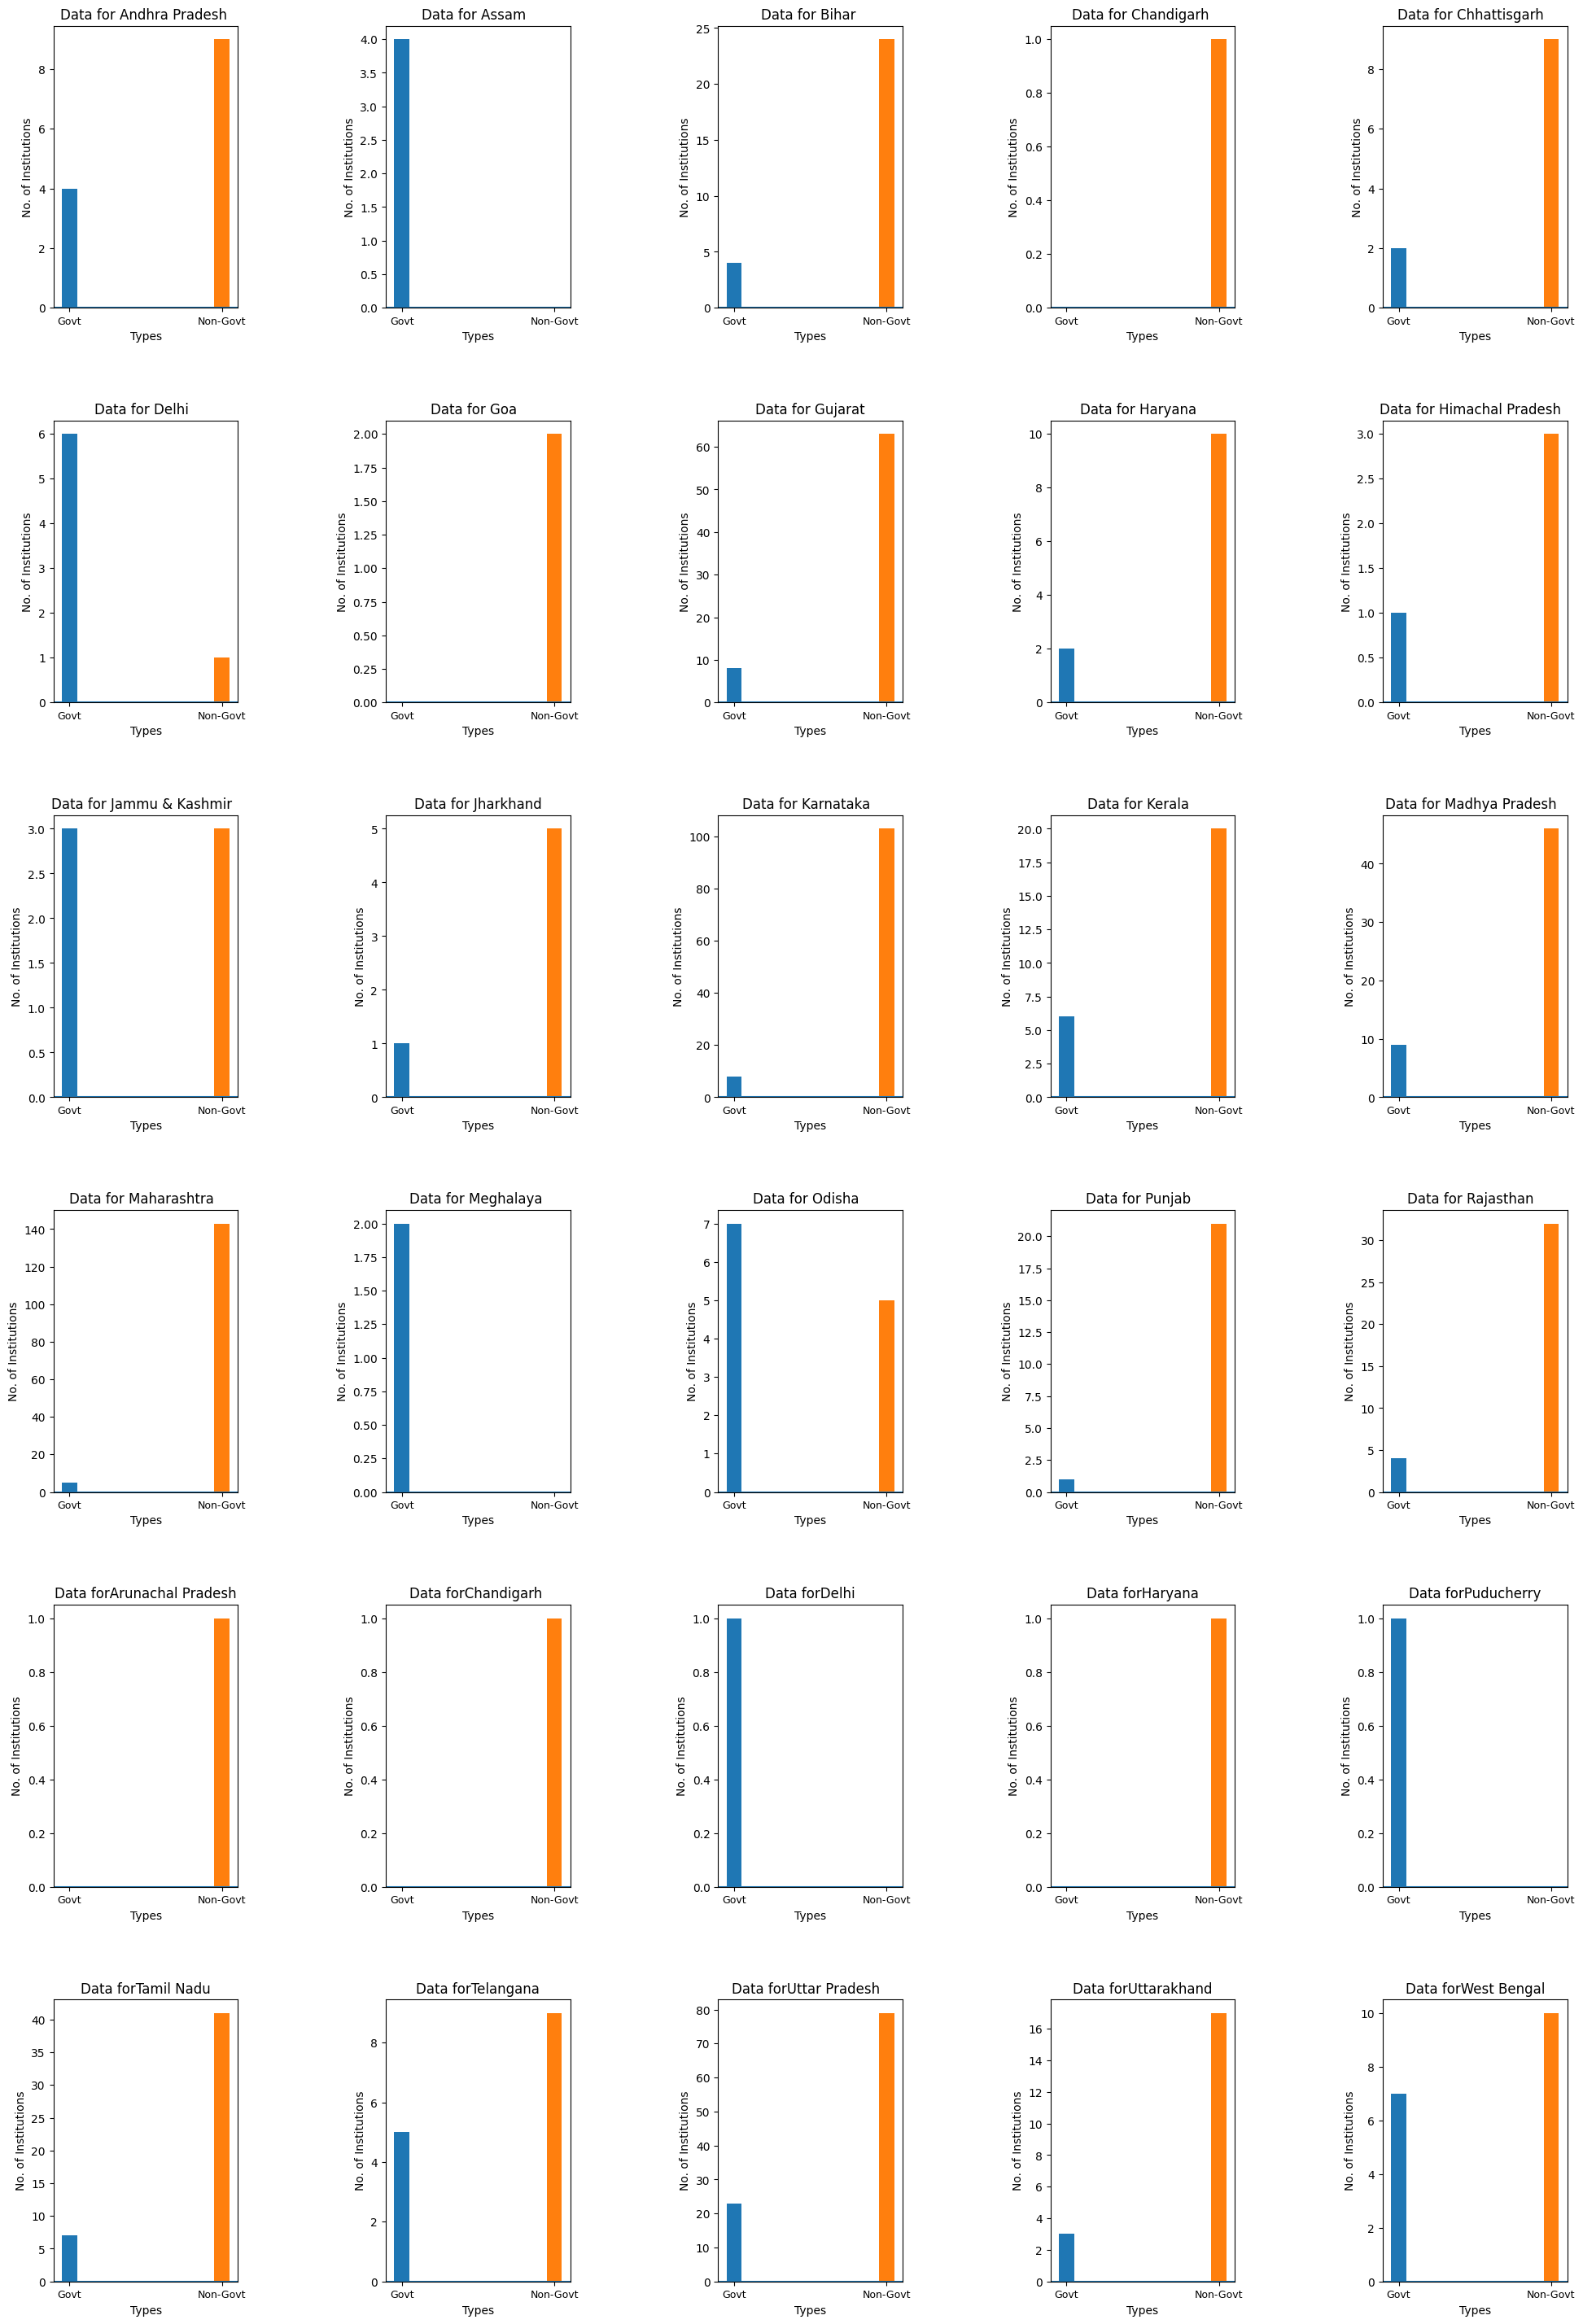

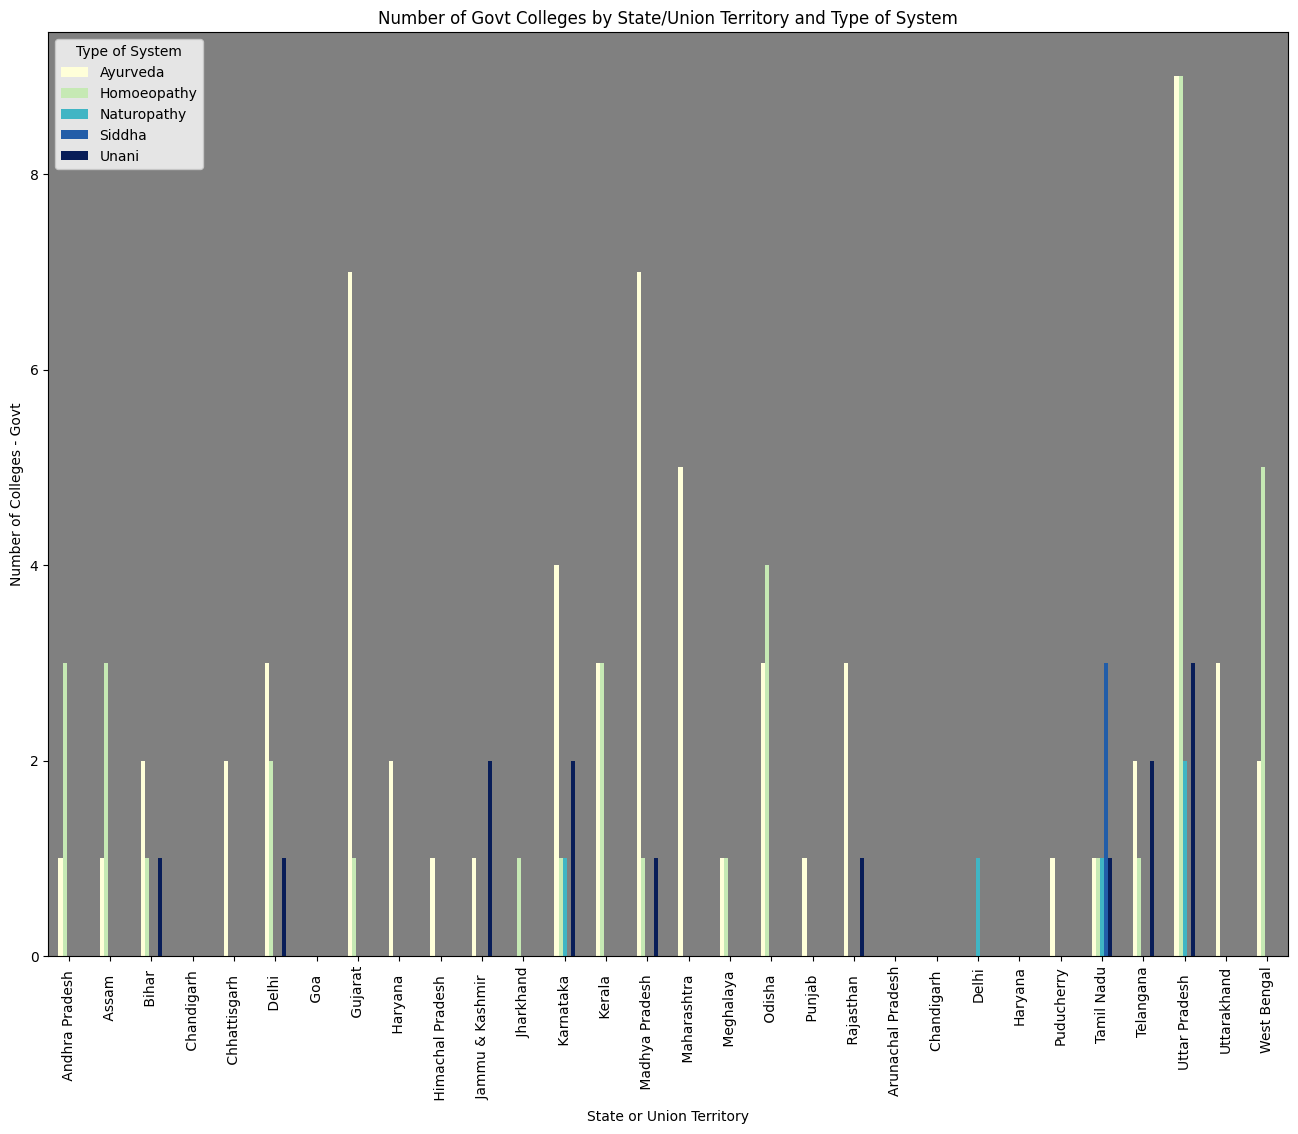

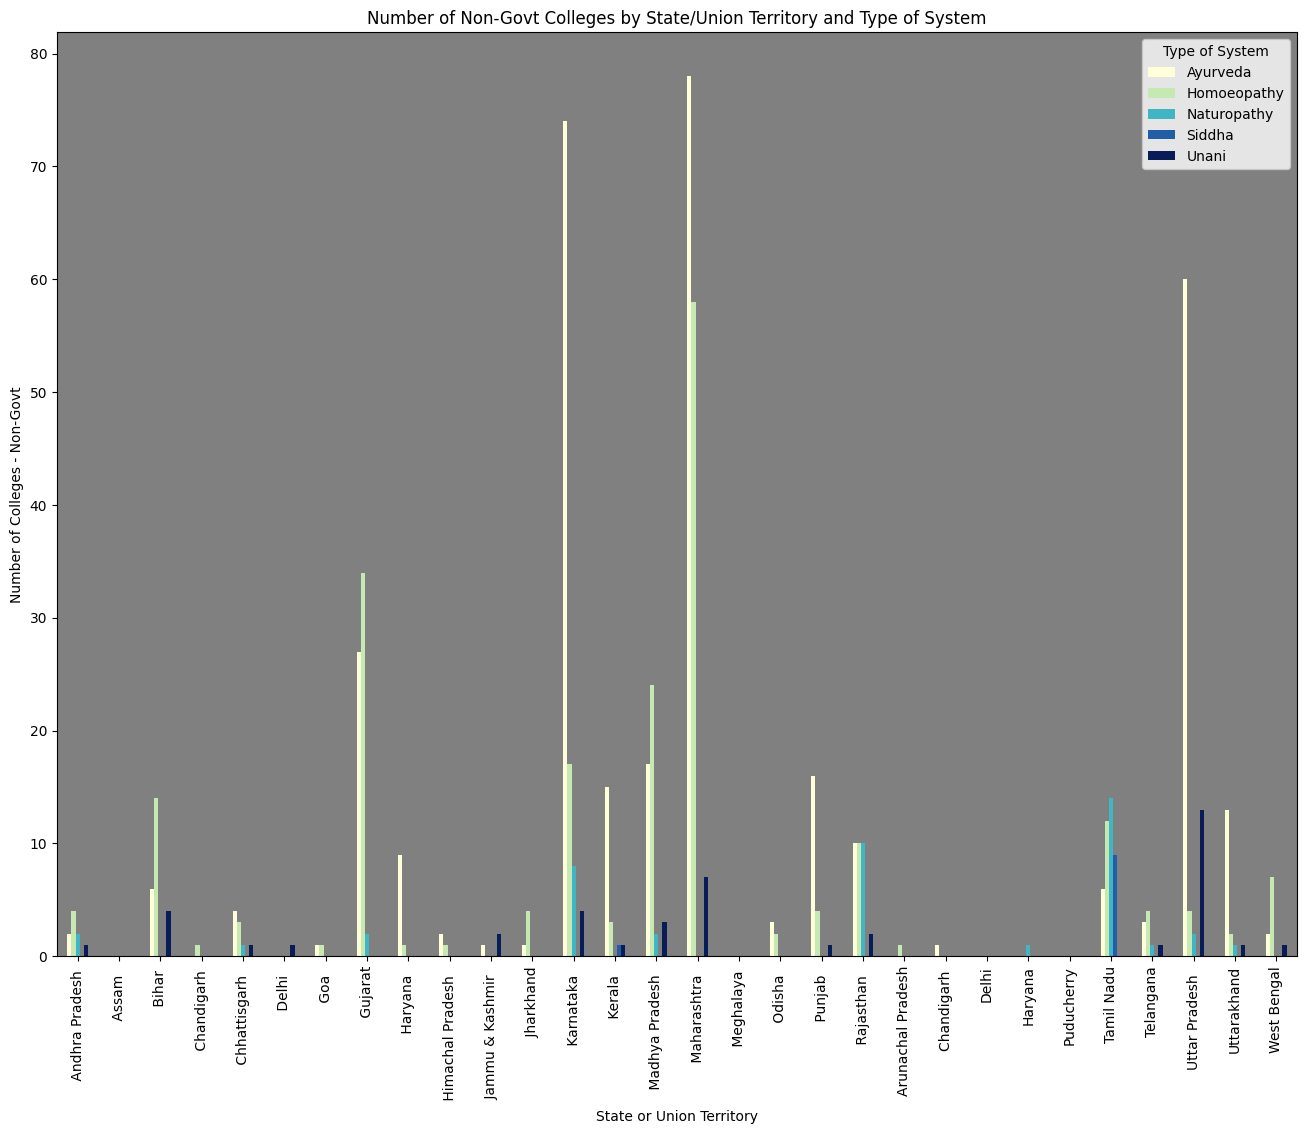

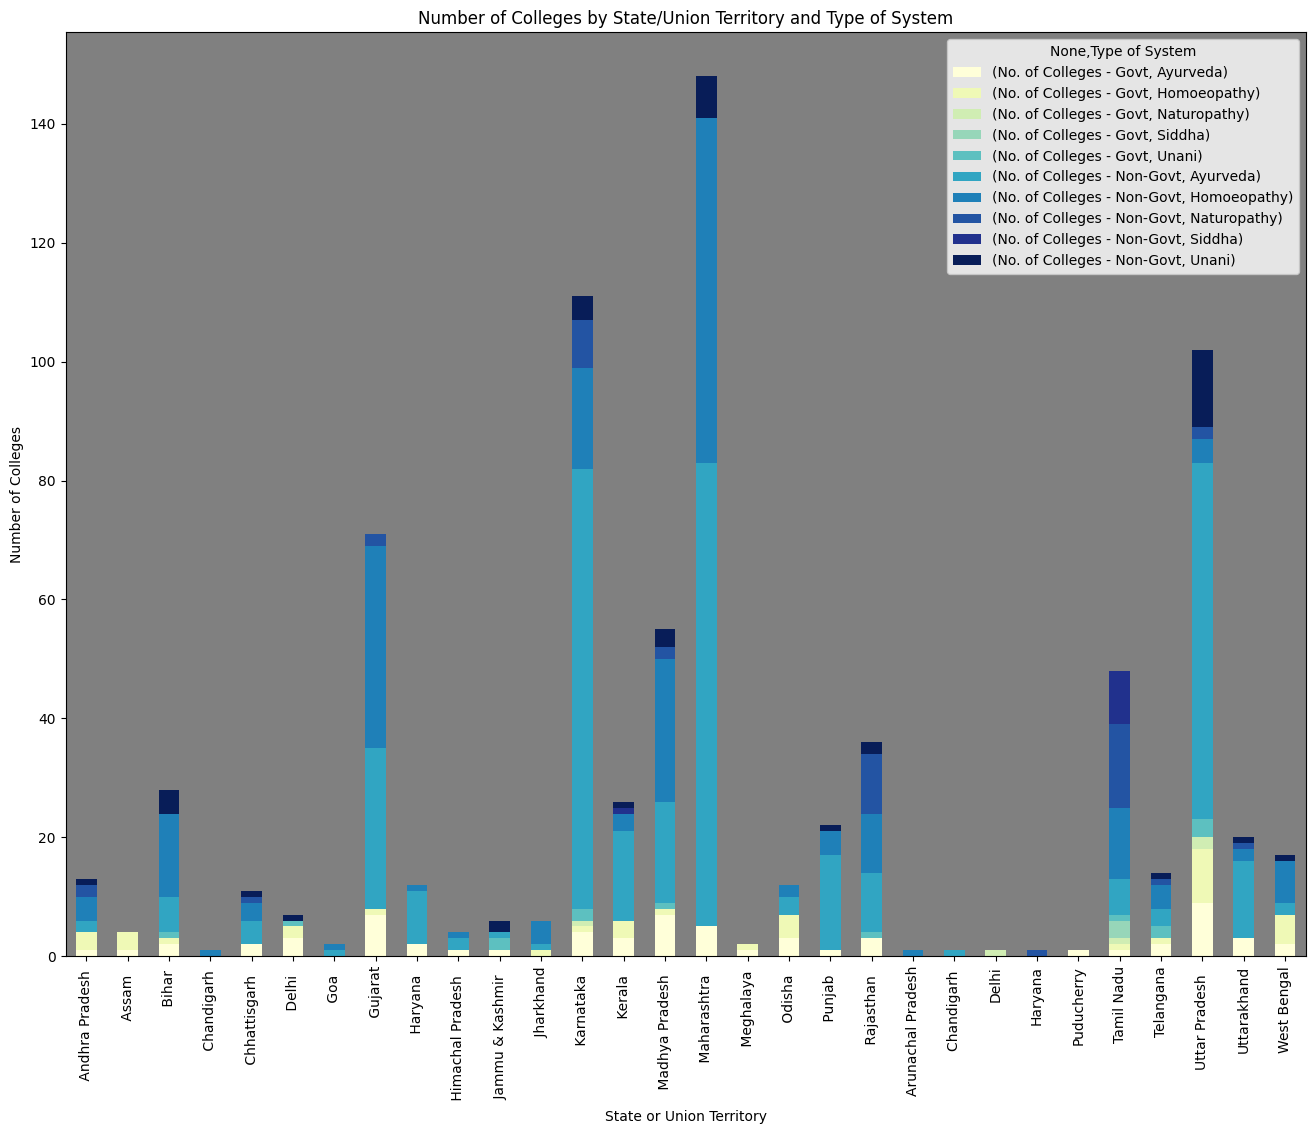

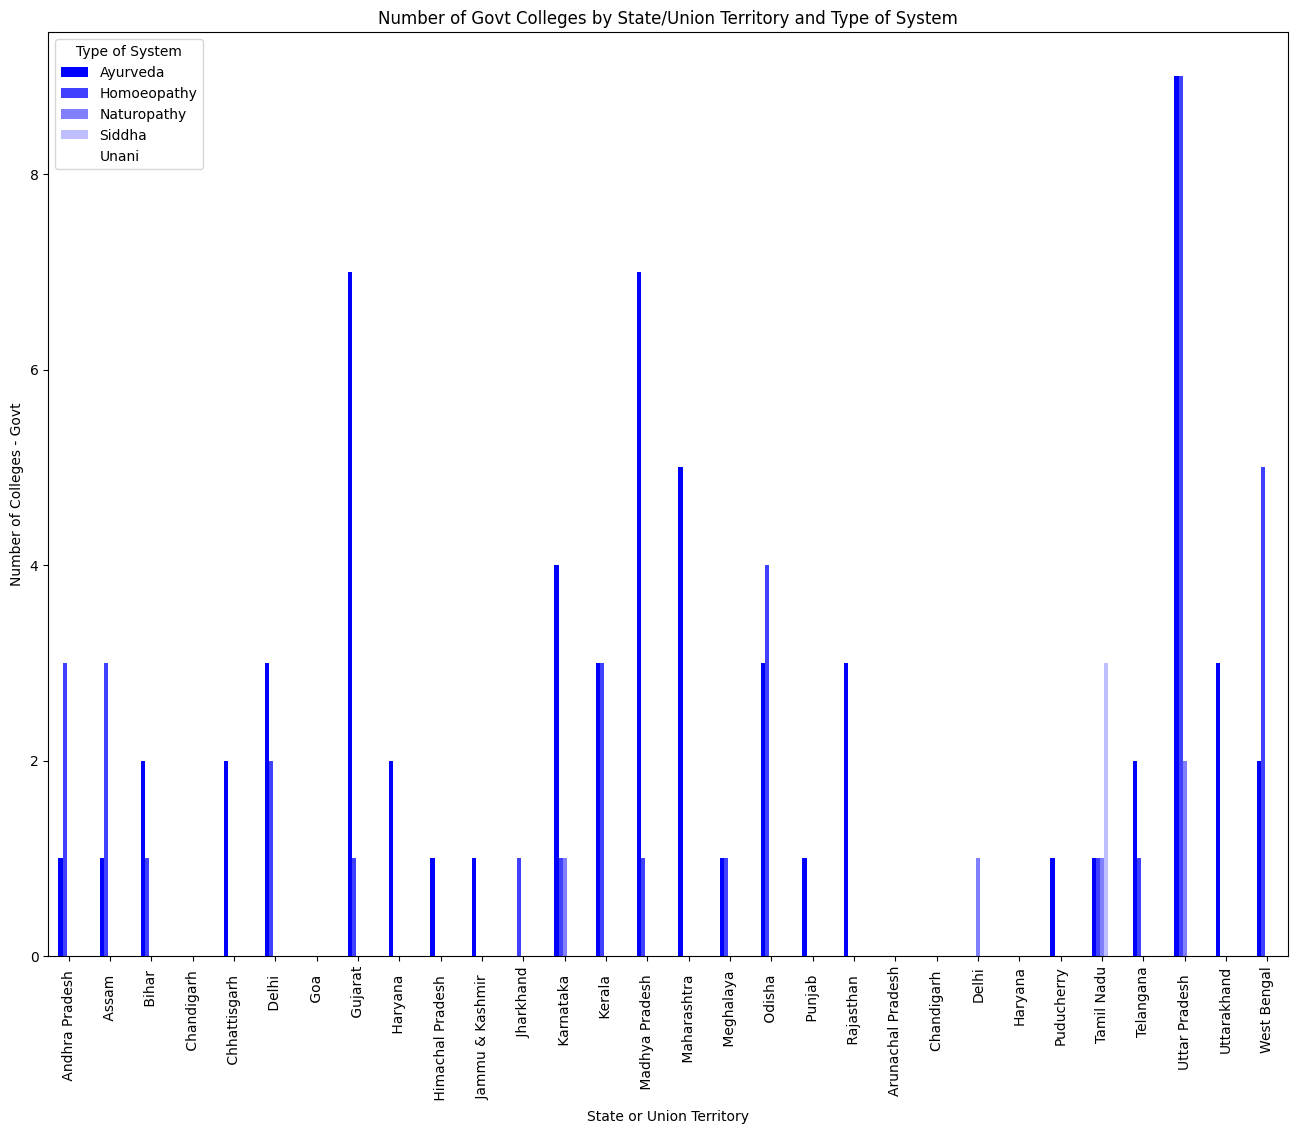

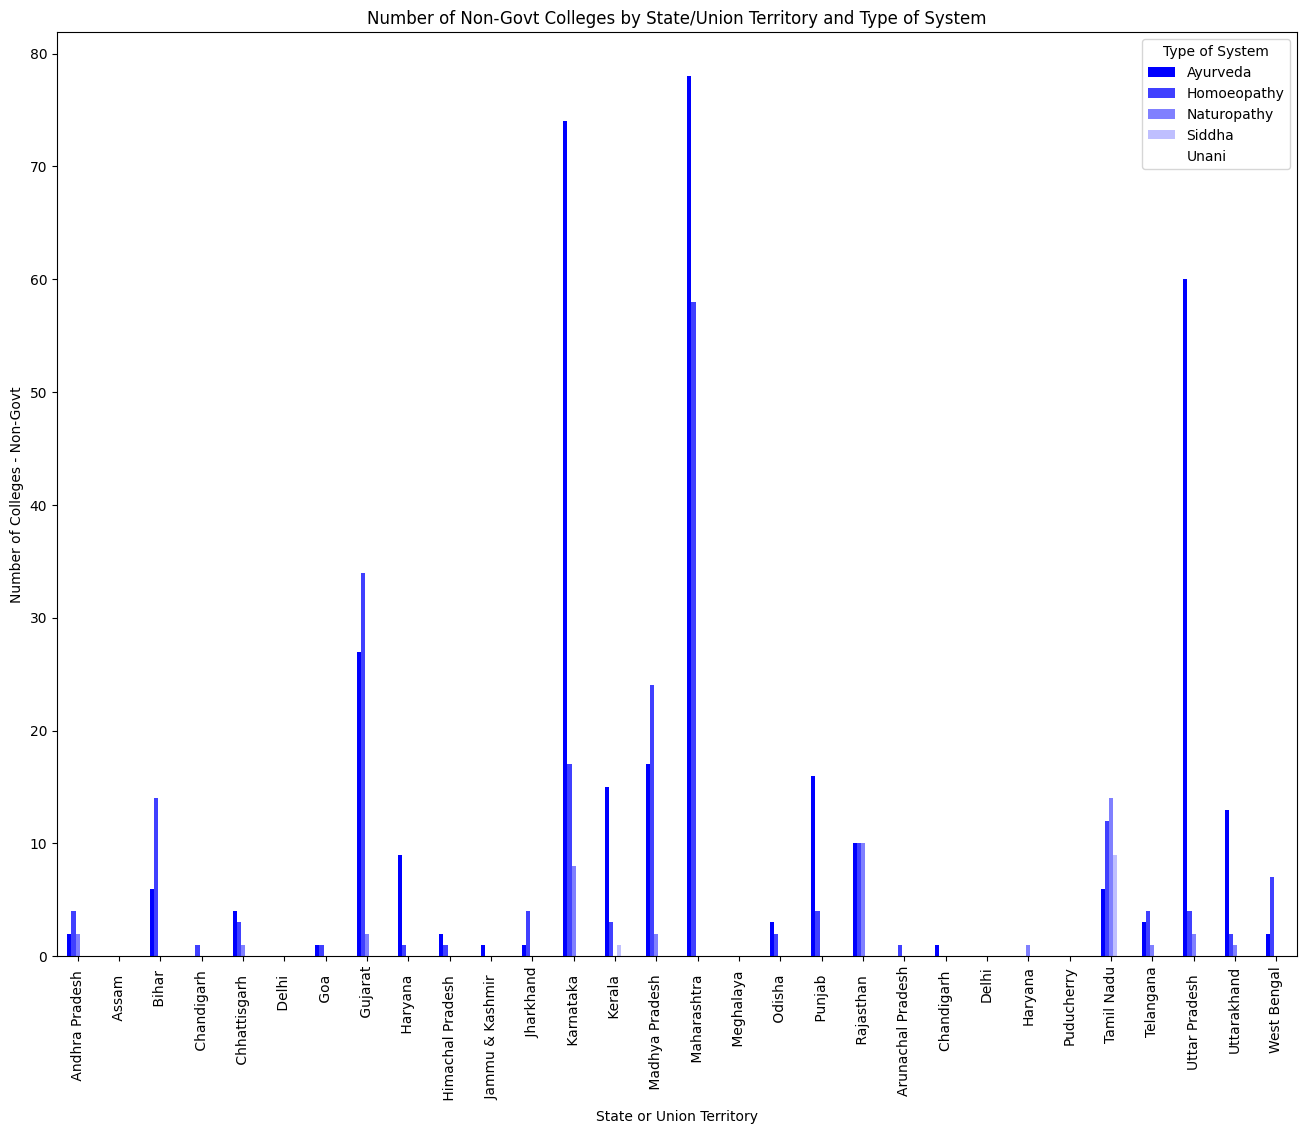

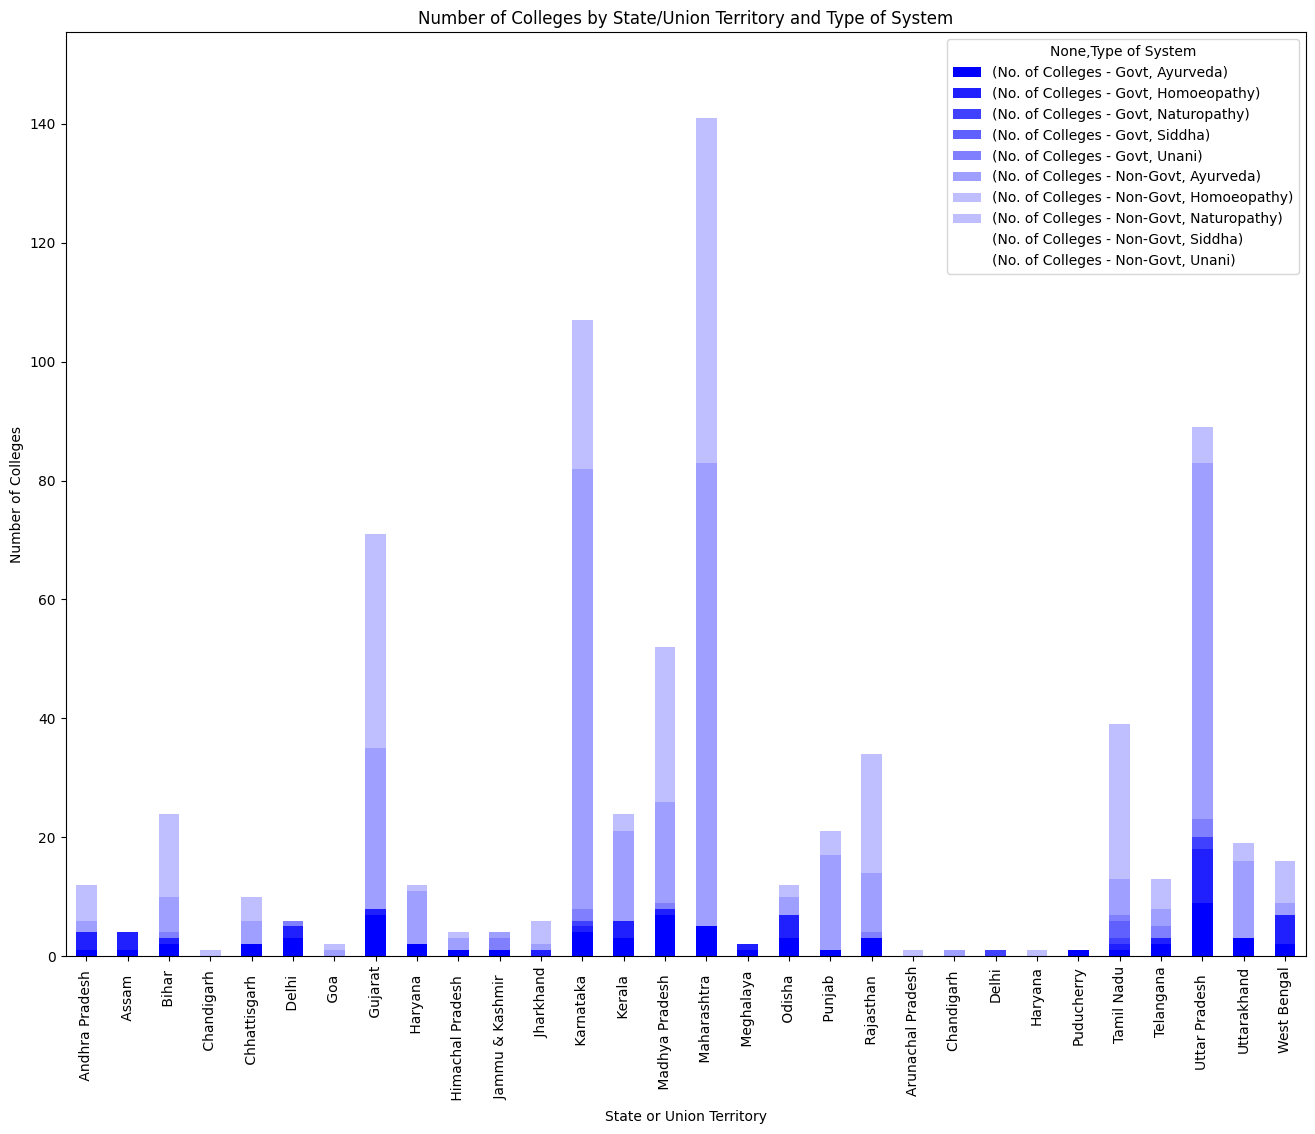

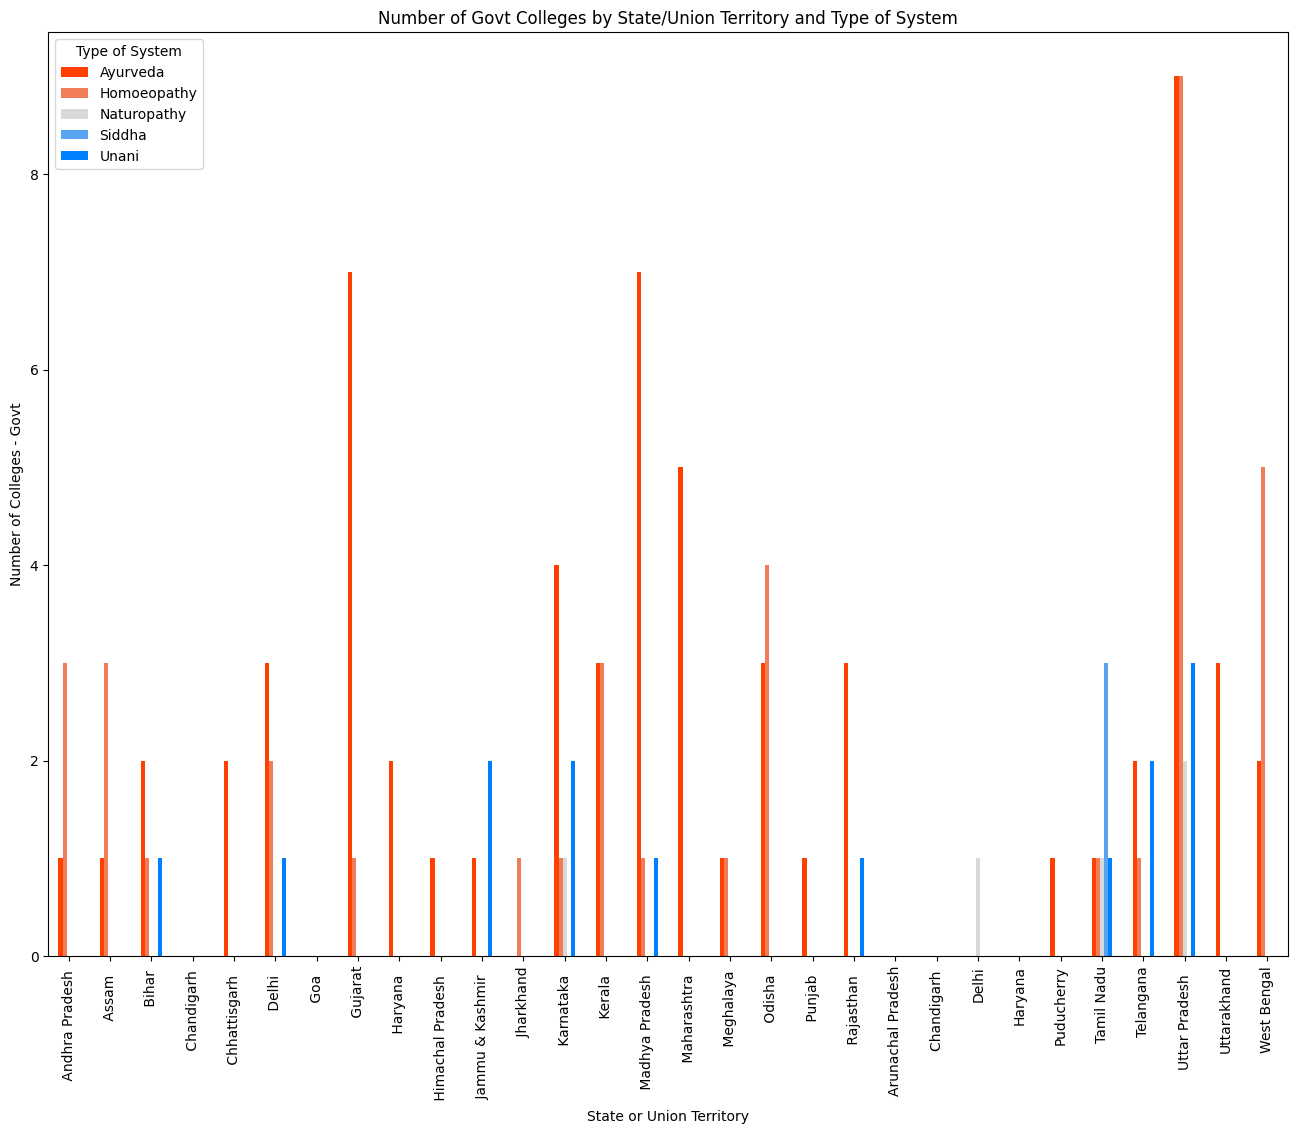

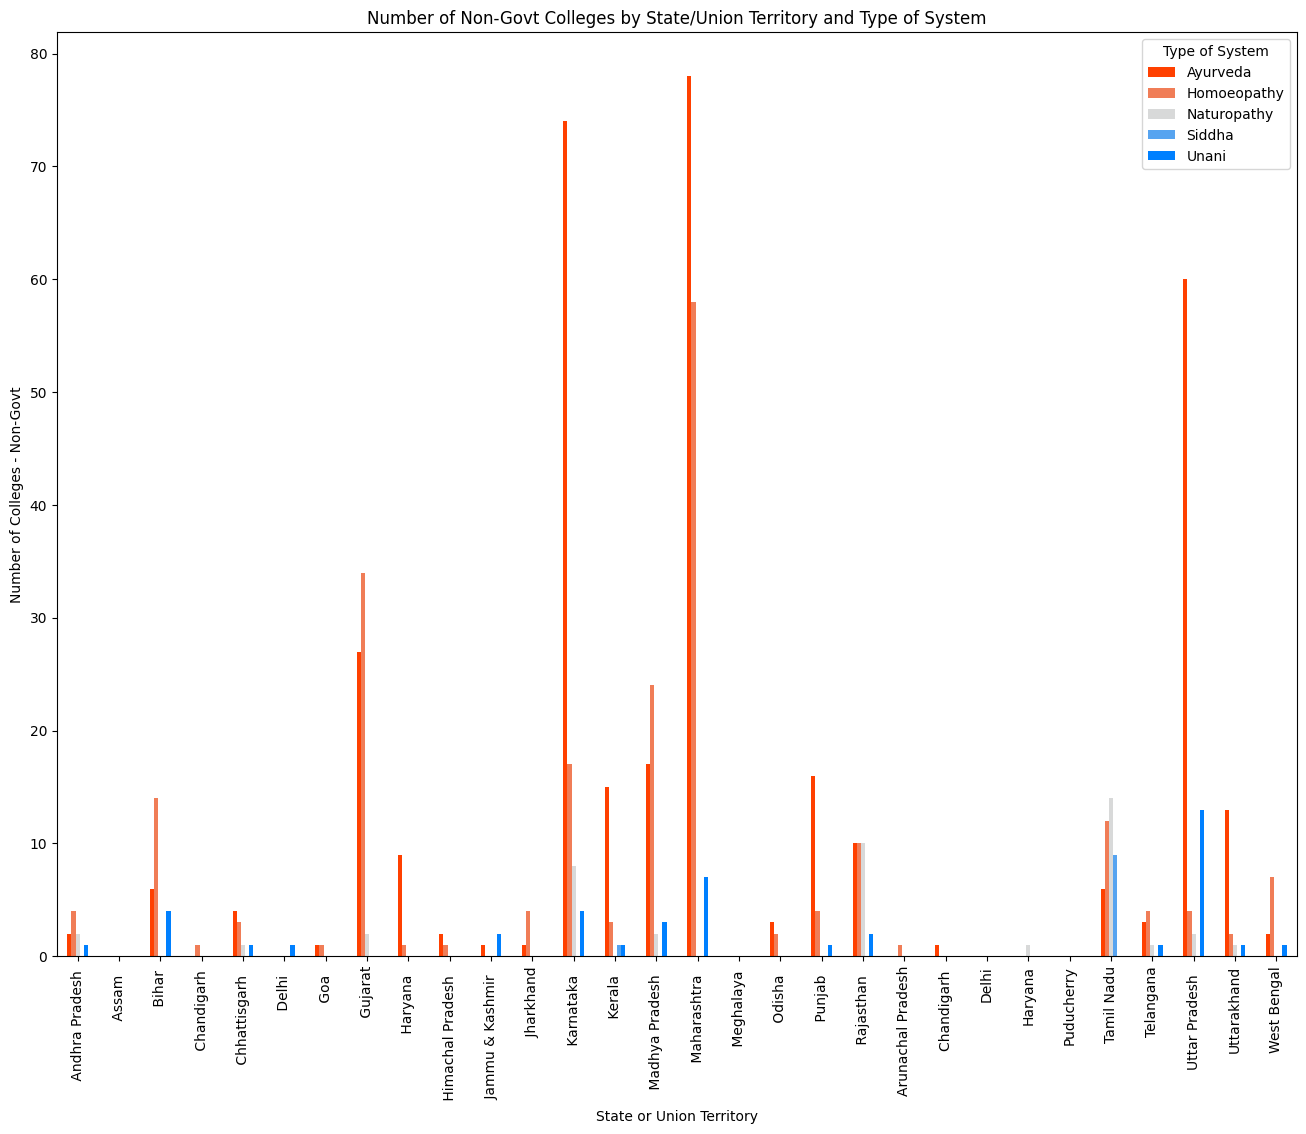

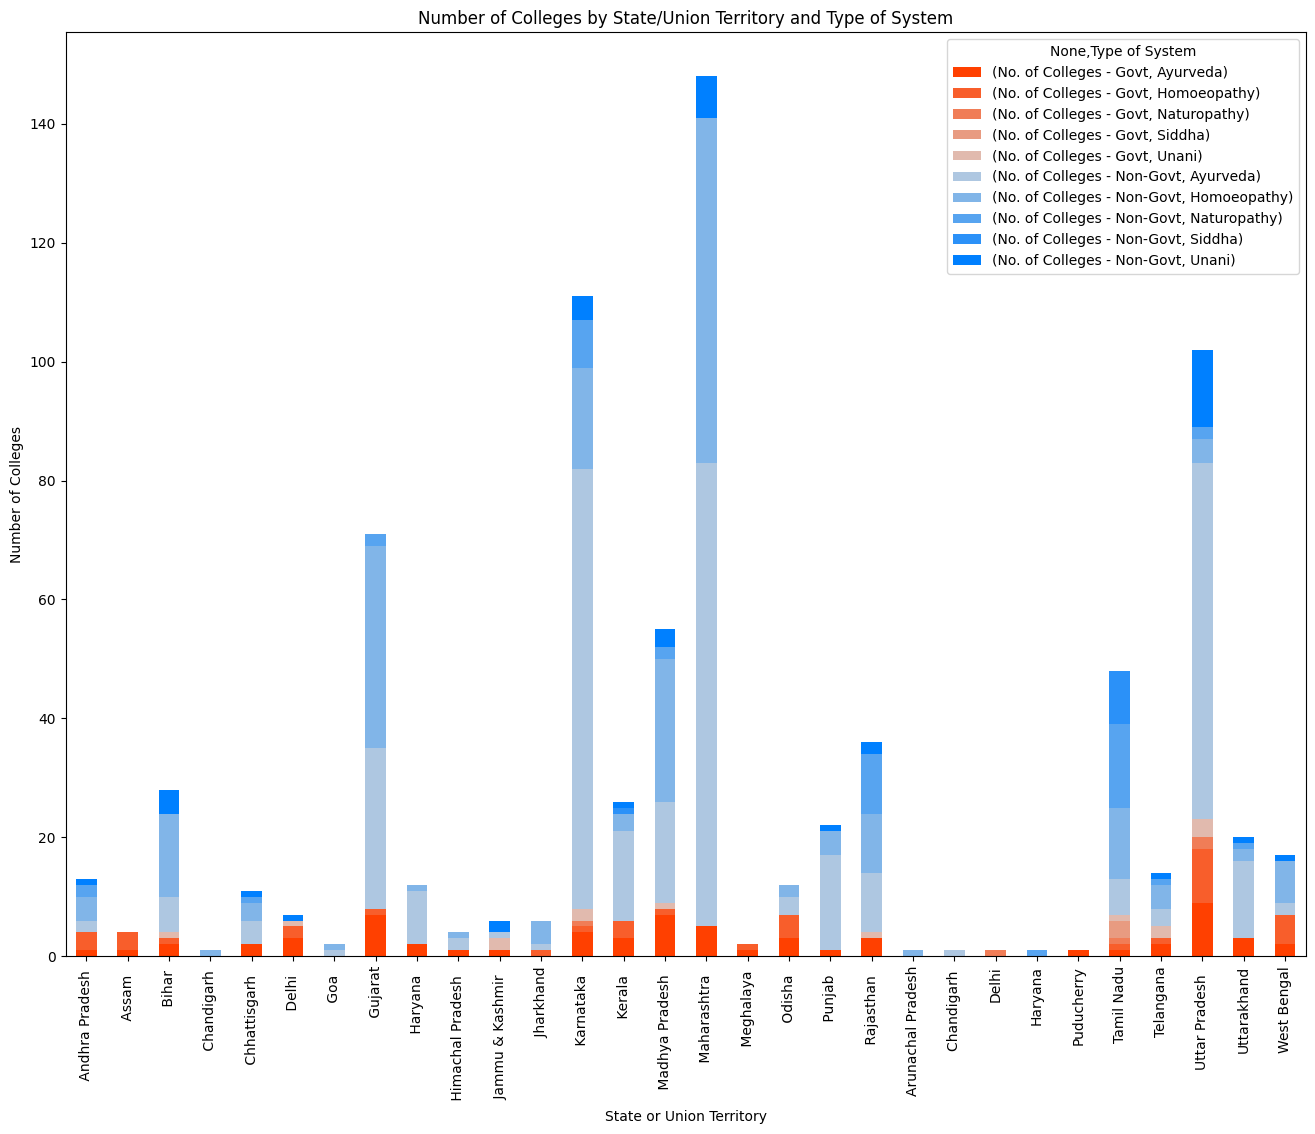

In [9]:
# %%
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.filterwarnings("ignore")
import matplotlib.cm as cm

# %%
# Read the three CSV files
df_ayush = pd.read_csv('./data/MergerdAyush_Colleges_in_India_01-04-2021_0.csv')
df_ayush.head()

# %%
no_of_colleges = df_ayush[['State or Union Territory', 'Type of System','No. of Colleges - Govt', 'No. of Colleges - Non-Govt']]

# %%
ayush_categories = np.unique(df_ayush['Type of System'])
ayush_categories

# %%
grouped = no_of_colleges.groupby('State or Union Territory')
grouped

# %%
grouping_without_ayush = grouped.sum()
grouping_without_ayush = grouping_without_ayush.rename(columns={
    'No. of Colleges - Govt' : 'Govt',
    'No. of Colleges - Non-Govt' : 'Non-Govt'
})

# %% [markdown]
# # Govt vs Non-Govt for Each State

# %%
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(24, 36))

# Flatten the axs array so we can loop through it like a 1D array
axs = axs.flatten()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
# Loop through each row in the DataFrame
for i, (index, row) in enumerate(grouping_without_ayush.iterrows()):
    # Plot a stacked bar chart for the row's data
    axs[i].bar(row.index, row.values, color=colors, width=0.1)
    axs[i].axhline(y=0)
    axs[i].set_xticklabels(row.index, fontsize=9, wrap=True)
    # Customize the plot as desired
    axs[i].set_title(f"Data for{row.name}")
    axs[i].set_xlabel("Types")
    axs[i].set_ylabel("No. of Institutions")

# Hide any unused subplots
for j in range(i+1, len(axs)):
    axs[j].axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.8)

# Show the plot
plt.show()

# %%
grouped2 = df_ayush.groupby(['Type of System', 'State or Union Territory'])
grouping_with_ayush = grouped2.sum()
grouping_with_ayush

# %%
grouped2 = df_ayush.groupby(['State or Union Territory', 'Type of System']).sum()
cmap = plt.cm.get_cmap('YlGnBu')


# Create a bar chart for No. of Colleges - Govt
fig1, ax1 = plt.subplots(figsize=(16, 12))
ax1.set_facecolor("gray")
govt_colleges = grouped2['No. of Colleges - Govt'].unstack()
govt_colleges.plot(kind='bar',colormap=cmap, ax=ax1)
ax1.set_xlabel('State or Union Territory')
ax1.set_ylabel('Number of Colleges - Govt')
ax1.set_title('Number of Govt Colleges by State/Union Territory and Type of System')

# Create a bar chart for No. of Colleges - Non-Govt
fig2, ax2 = plt.subplots(figsize=(16, 12))
ax2.set_facecolor("gray")
non_govt_colleges = grouped2['No. of Colleges - Non-Govt'].unstack()
non_govt_colleges.plot(kind='bar', ax=ax2, colormap=cmap)
ax2.set_xlabel('State or Union Territory')
ax2.set_ylabel('Number of Colleges - Non-Govt')
ax2.set_title('Number of Non-Govt Colleges by State/Union Territory and Type of System')

# Create a stacked bar chart for No. of Colleges - Govt and No. of Colleges - Non-Govt
fig3, ax3 = plt.subplots(figsize=(16, 12))
ax3.set_facecolor("gray")
grouped2[['No. of Colleges - Govt', 'No. of Colleges - Non-Govt']].unstack().plot(kind='bar',colormap=cmap, stacked=True, ax=ax3)
ax3.set_xlabel('State or Union Territory')
ax3.set_ylabel('Number of Colleges')
ax3.set_title('Number of Colleges by State/Union Territory and Type of System')

# Show the plots
plt.show()


# %%
import matplotlib.colors as colors
import matplotlib.colors as mcolors

base_color = 'blue'
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by blending it with white
    """
    color = mcolors.to_rgb(color)
    white = (1.0, 1.0, 1.0)
    red = color[0] + (white[0] - color[0]) * amount
    green = color[1] + (white[1] - color[1]) * amount
    blue = color[2] + (white[2] - color[2]) * amount
    return (red, green, blue)

palette1 = colors.ListedColormap(
    [lighten_color(base_color, i) for i in np.linspace(0, 1, 9)]
)

grouped2 = df_ayush.groupby(['State or Union Territory', 'Type of System']).sum()


# Create a bar chart for No. of Colleges - Govt
fig1, ax1 = plt.subplots(figsize=(16, 12))
govt_colleges = grouped2['No. of Colleges - Govt'].unstack()
govt_colleges.plot(kind='bar',colormap=palette1, ax=ax1)
ax1.set_xlabel('State or Union Territory')
ax1.set_ylabel('Number of Colleges - Govt')
ax1.set_title('Number of Govt Colleges by State/Union Territory and Type of System')

# Create a bar chart for No. of Colleges - Non-Govt

fig2, ax2 = plt.subplots(figsize=(16, 12))
non_govt_colleges = grouped2['No. of Colleges - Non-Govt'].unstack()
non_govt_colleges.plot(kind='bar', ax=ax2, colormap=palette1)
ax2.set_xlabel('State or Union Territory')
ax2.set_ylabel('Number of Colleges - Non-Govt')
ax2.set_title('Number of Non-Govt Colleges by State/Union Territory and Type of System')

# Create a stacked bar chart for No. of Colleges - Govt and No. of Colleges - Non-Govt
fig3, ax3 = plt.subplots(figsize=(16, 12))
grouped2[['No. of Colleges - Govt', 'No. of Colleges - Non-Govt']].unstack().plot(kind='bar',colormap=palette1, stacked=True, ax=ax3)
ax3.set_xlabel('State or Union Territory')
ax3.set_ylabel('Number of Colleges')
ax3.set_title('Number of Colleges by State/Union Territory and Type of System')

# Show the plots
plt.show()


# %%
import matplotlib.colors as colors
import matplotlib.colors as mcolors
color_start = '#ff4000'   # blue
color_end = '#0080ff'     # red
color_neutral = '#d9d9d9' # gray

# Create a list of colors that transitions from blue to red through the neutral gray color
colors_list = [colors.LinearSegmentedColormap.from_list("", [color_start, color_neutral, color_end])(x) for x in np.linspace(0, 1, 11)]

# Use the ListedColormap function to create a bipolar sequential palette
palette2 = colors.ListedColormap(colors_list, name='bipolar')


grouped2 = df_ayush.groupby(['State or Union Territory', 'Type of System']).sum()


# Create a bar chart for No. of Colleges - Govt
fig1, ax1 = plt.subplots(figsize=(16, 12))
govt_colleges = grouped2['No. of Colleges - Govt'].unstack()
govt_colleges.plot(kind='bar',colormap=palette2, ax=ax1)
ax1.set_xlabel('State or Union Territory')
ax1.set_ylabel('Number of Colleges - Govt')
ax1.set_title('Number of Govt Colleges by State/Union Territory and Type of System')

# Create a bar chart for No. of Colleges - Non-Govt

fig2, ax2 = plt.subplots(figsize=(16, 12))
non_govt_colleges = grouped2['No. of Colleges - Non-Govt'].unstack()
non_govt_colleges.plot(kind='bar', ax=ax2, colormap=palette2)
ax2.set_xlabel('State or Union Territory')
ax2.set_ylabel('Number of Colleges - Non-Govt')
ax2.set_title('Number of Non-Govt Colleges by State/Union Territory and Type of System')

# Create a stacked bar chart for No. of Colleges - Govt and No. of Colleges - Non-Govt
fig3, ax3 = plt.subplots(figsize=(16, 12))
grouped2[['No. of Colleges - Govt', 'No. of Colleges - Non-Govt']].unstack().plot(kind='bar',colormap=palette2, stacked=True, ax=ax3)
ax3.set_xlabel('State or Union Territory')
ax3.set_ylabel('Number of Colleges')
ax3.set_title('Number of Colleges by State/Union Territory and Type of System')

# Show the plots
plt.show()





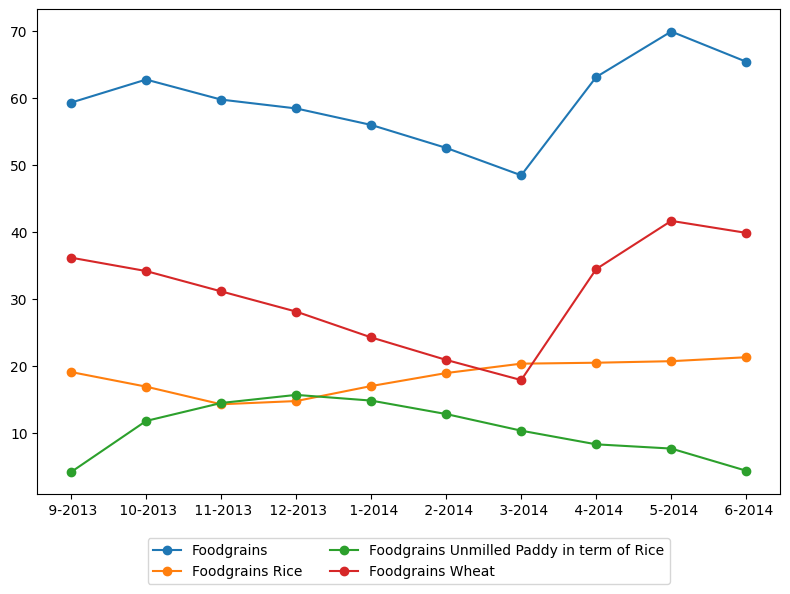

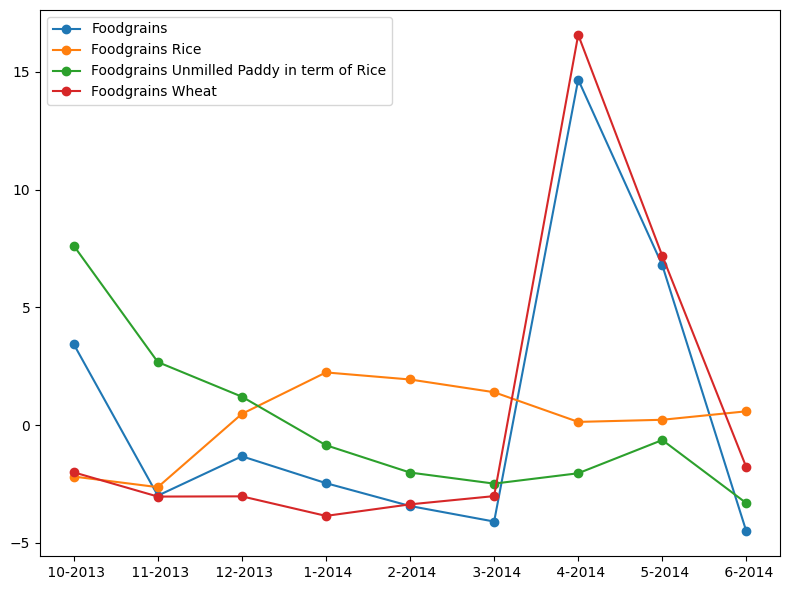

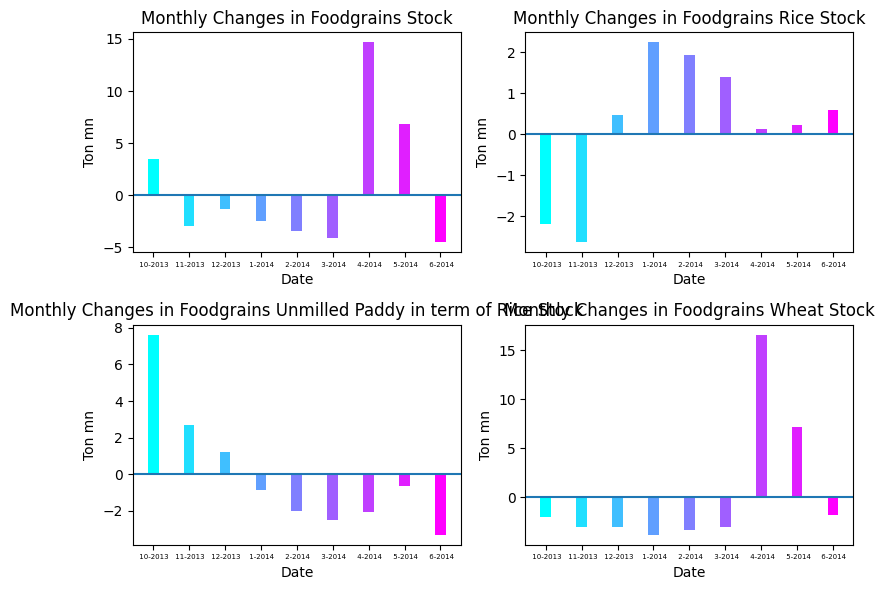

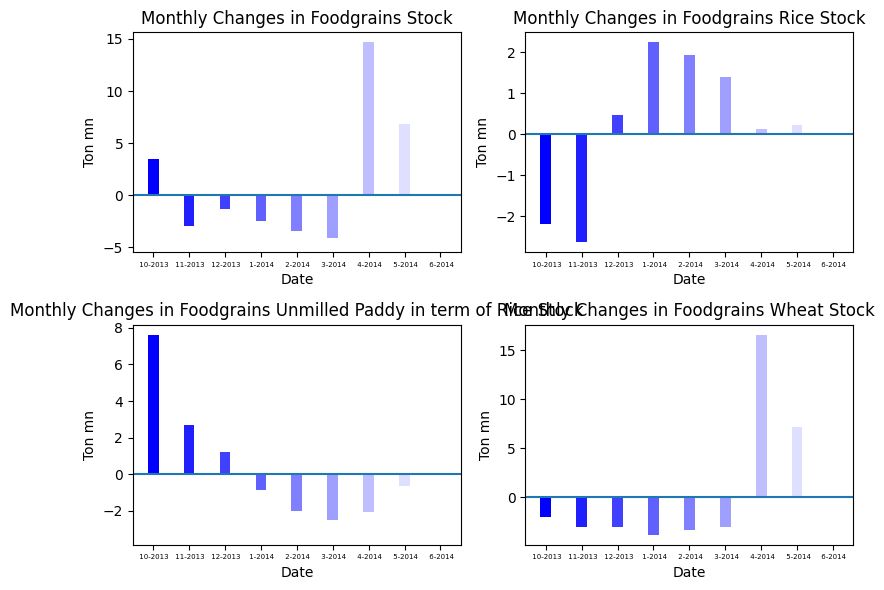

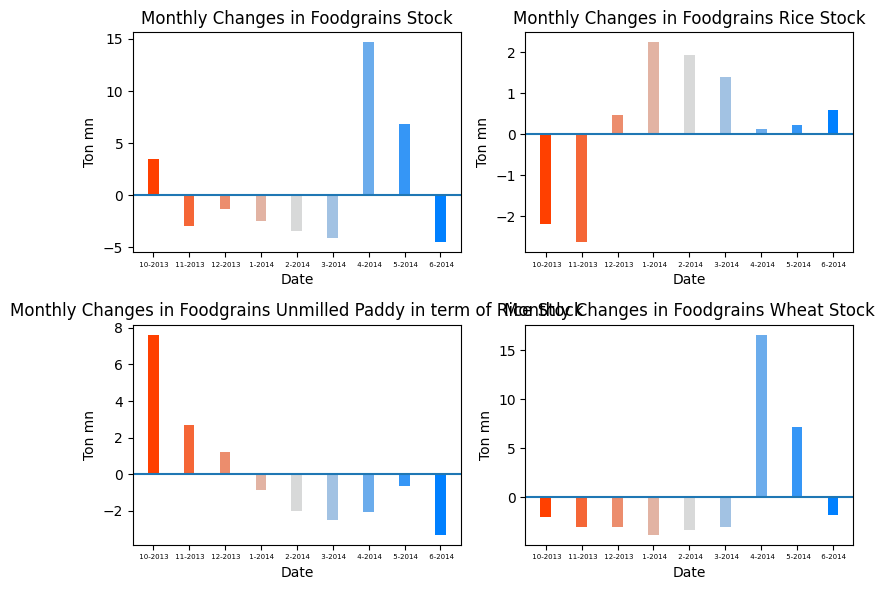

In [10]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %%
import warnings
warnings.filterwarnings("ignore")

# %%
# Read the three CSV files
df_foodgrain = pd.read_csv('./data/Production_of_Agriculture_Stock-Ministry_of_Finance.csv')

# %%
df_foodgrain.head()

# %%
fig = plt.figure(figsize=(8, 6))

for i in range(len(df_foodgrain)):
    plt.plot(df_foodgrain.iloc[i][3:], label=f"{df_foodgrain.iloc[i][0]}", marker='o')

plt.legend(ncol = 2, bbox_to_anchor=(0.5, -0.2), loc='lower center')
fig.tight_layout()
plt.show()

# %%
diff_fg = df_foodgrain.iloc[:, 3:].diff(axis=1)
diff_fg = pd.concat((df_foodgrain.iloc[:, :3], diff_fg.iloc[:, 1:]), axis=1)
diff_fg

# %%
fig = plt.figure(figsize=(8, 6))

for i in range(len(diff_fg)):
    plt.plot(diff_fg.iloc[i][3:], label=f"{diff_fg.iloc[i][0]}", marker='o')

# plt.legend(ncol = 2, bbox_to_anchor=(0.5, -0.2), loc='lower center')
plt.legend()
fig.tight_layout()

plt.show()


# %% [markdown]
# ## Continuous Color Palette

# %%
import matplotlib.cm as cm
colors = cm.cool(np.linspace(0, 1, 9))
colors

fig, axs = plt.subplots(2, 2, figsize=(8, 6))
for i in range(2):
    for j in range(2):
        # plot the bar chart in the current subplot
        index = i*2 + j
        ax = axs[i, j]
        ax.bar(diff_fg.columns[3:], diff_fg.iloc[index][3:], width=0.3, bottom=0, color=colors)
        ax.axhline(y=0)
        ax.set_xticklabels(diff_fg.columns[3:], fontsize=5)
        ax.set_xlabel('Date')
        ax.set_ylabel('Ton mn')
        ax.set_title(f'Monthly Changes in {diff_fg.iloc[index][0]} Stock')

# adjust spacing between subplots
plt.tight_layout()

# show the plot
plt.show()


# %% [markdown]
# ## 1 Color Sequential Color Palette

# %%
import matplotlib.colors as colors
import matplotlib.colors as mcolors

base_color = 'blue'
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by blending it with white
    """
    color = mcolors.to_rgb(color)
    white = (1.0, 1.0, 1.0)
    red = color[0] + (white[0] - color[0]) * amount
    green = color[1] + (white[1] - color[1]) * amount
    blue = color[2] + (white[2] - color[2]) * amount
    return (red, green, blue)

palette = colors.ListedColormap(
    [lighten_color(base_color, i) for i in np.linspace(0, 1, 9)]
)


fig, axs = plt.subplots(2, 2, figsize=(8, 6))
for i in range(2):
    for j in range(2):
        # plot the bar chart in the current subplot
        index = i*2 + j
        ax = axs[i, j]
        ax.bar(diff_fg.columns[3:], diff_fg.iloc[index][3:], width=0.3, bottom=0, color=palette(range(len(diff_fg.iloc[index][3:]))))
        ax.axhline(y=0)
        ax.set_xticklabels(diff_fg.columns[3:], fontsize=5)
        ax.set_xlabel('Date')
        ax.set_ylabel('Ton mn')
        ax.set_title(f'Monthly Changes in {diff_fg.iloc[index][0]} Stock')

# adjust spacing between subplots
plt.tight_layout()

# show the plot
plt.show()



# %% [markdown]
# # Bipolar Sequential Scale
# Blue -> Gray -> Red

# %%
color_start = '#ff4000'   # blue
color_end = '#0080ff'     # red
color_neutral = '#d9d9d9' # gray

# Create a list of colors that transitions from blue to red through the neutral gray color
colors_list = [colors.LinearSegmentedColormap.from_list("", [color_start, color_neutral, color_end])(x) for x in np.linspace(0, 1, 9)]

# Use the ListedColormap function to create a bipolar sequential palette
palette = colors.ListedColormap(colors_list, name='bipolar')
# loop over rows and columns of the grid
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
for i in range(2):
    for j in range(2):
        # plot the bar chart in the current subplot
        index = i*2 + j
        ax = axs[i, j]
        ax.bar(diff_fg.columns[3:], diff_fg.iloc[index][3:], width=0.3, bottom=0, color=palette(range(len(diff_fg.iloc[index][3:]))))
        ax.axhline(y=0)
        ax.set_xticklabels(diff_fg.columns[3:], fontsize=5)
        ax.set_xlabel('Date')
        ax.set_ylabel('Ton mn')
        ax.set_title(f'Monthly Changes in {diff_fg.iloc[index][0]} Stock')

# adjust spacing between subplots
plt.tight_layout()

# show the plot
plt.show()


# %%





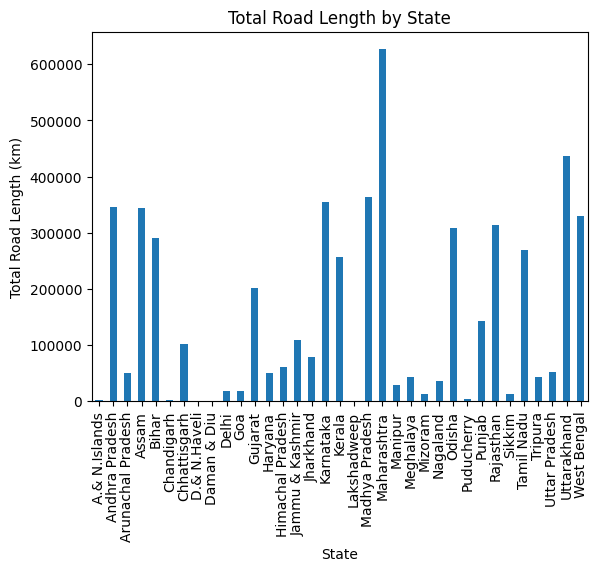

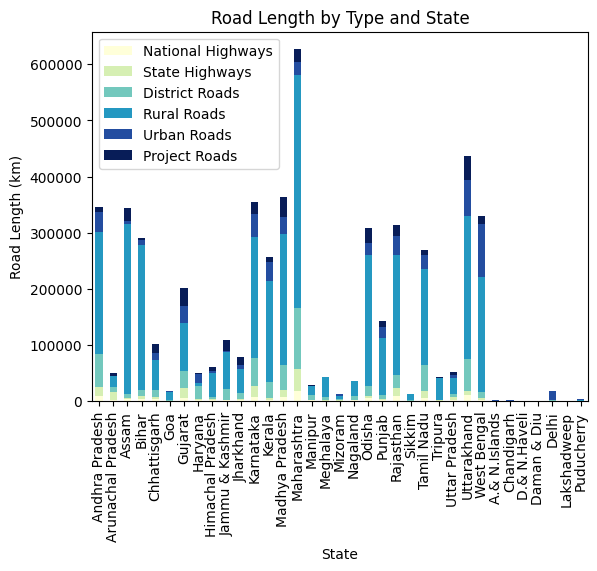

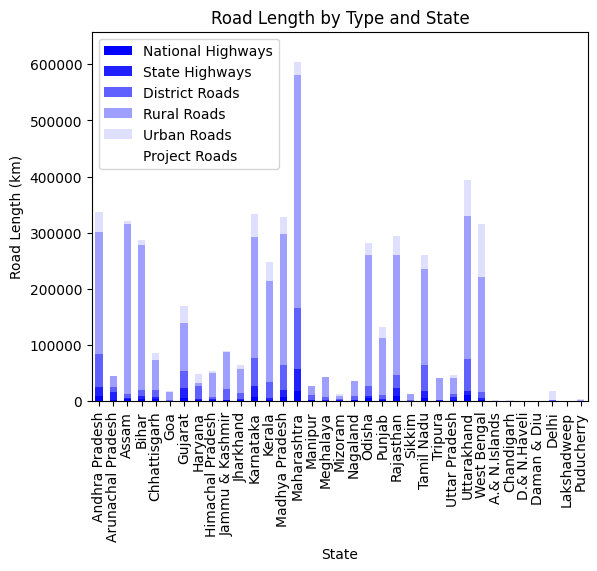

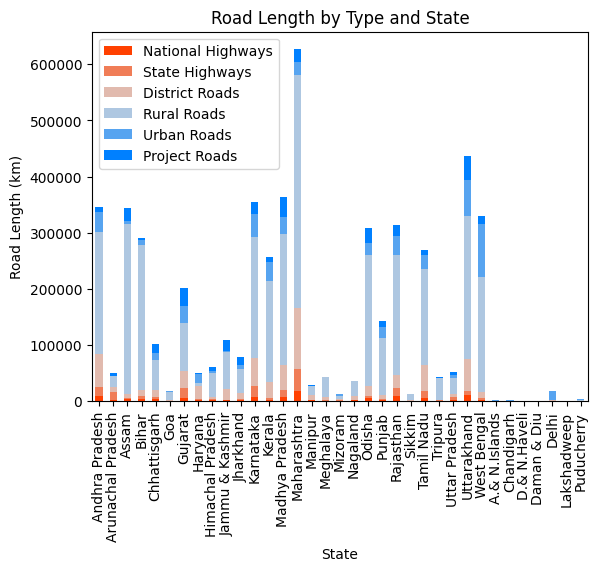

In [11]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# %%
df_roads = pd.read_csv('./data/Road_Transport_BRS_2017-18_Annexure7_9c.csv')
rows_to_drop = df_roads[df_roads['Name of the States'] == 'INDIA (1) ++'].index
df_roads.drop(rows_to_drop, inplace=True)
df_roads.head()

# %%
cmap = plt.cm.get_cmap('YlGnBu')

import matplotlib.colors as colors
import matplotlib.colors as mcolors
base_color = 'blue'
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by blending it with white
    """
    color = mcolors.to_rgb(color)
    white = (1.0, 1.0, 1.0)
    red = color[0] + (white[0] - color[0]) * amount
    green = color[1] + (white[1] - color[1]) * amount
    blue = color[2] + (white[2] - color[2]) * amount
    return (red, green, blue)

palette1 = colors.ListedColormap(
    [lighten_color(base_color, i) for i in np.linspace(0, 1, 9)]
)


color_start = '#ff4000'   # blue
color_end = '#0080ff'     # red
color_neutral = '#d9d9d9' # gray

# Create a list of colors that transitions from blue to red through the neutral gray color
colors_list = [colors.LinearSegmentedColormap.from_list("", [color_start, color_neutral, color_end])(x) for x in np.linspace(0, 1, 11)]

# Use the ListedColormap function to create a bipolar sequential palette
palette2 = colors.ListedColormap(colors_list, name='bipolar')

# %%
grouped = df_roads.groupby('Name of the States')['Total road Length'].sum()

# Create a bar chart of the total road length by state
fig, ax = plt.subplots()
grouped.plot(kind='bar', ax=ax)
ax.set_xlabel('State')
ax.set_ylabel('Total Road Length (km)')
ax.set_title('Total Road Length by State')
plt.show()

# %%
fig, ax = plt.subplots()
df_roads[['National Highways', 'State Highways', 'District Roads', 'Rural Roads', 'Urban Roads', 'Project Roads']].plot(kind='bar', stacked=True, ax=ax, colormap=cmap)
ax.set_xlabel('State')
ax.set_ylabel('Road Length (km)')
ax.set_title('Road Length by Type and State')
ax.set_xticklabels(df_roads['Name of the States'])
ax.legend(loc='upper left')
plt.show()

# %%
fig, ax = plt.subplots()
df_roads[['National Highways', 'State Highways', 'District Roads', 'Rural Roads', 'Urban Roads', 'Project Roads']].plot(kind='bar', stacked=True, ax=ax, colormap=palette1)
ax.set_xlabel('State')
ax.set_ylabel('Road Length (km)')
ax.set_title('Road Length by Type and State')
ax.set_xticklabels(df_roads['Name of the States'])
ax.legend(loc='upper left')
plt.show()

# %%
fig, ax = plt.subplots()
df_roads[['National Highways', 'State Highways', 'District Roads', 'Rural Roads', 'Urban Roads', 'Project Roads']].plot(kind='bar', stacked=True, ax=ax, colormap=palette2)
ax.set_xlabel('State')
ax.set_ylabel('Road Length (km)')
ax.set_title('Road Length by Type and State')
ax.set_xticklabels(df_roads['Name of the States'])
ax.legend(loc='upper left')
plt.show()

# %%



